<a href="https://colab.research.google.com/github/TorradoSantiago/korea_income-welfare/blob/master/Modelo%20Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORTACION DE DATOS Y LIBRERIAS

In [ ]:
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install seaborn
#!pip install scikitlearn


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sc
from sklearn.linear_model import LinearRegression

from mpl_toolkits.mplot3d import Axes3D

from bokeh.io import output_notebook, show, reset_output
import bokeh
from bokeh.plotting import figure


In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/DATA SCIENCE CODER/ProyectoFinal.DS/Korea_Income_and_Welfare.csv')
df.head()

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker
0,10101,2005,1,1,614.0,1,2,1936,2,2,2,,,8
1,10101,2011,7,1,896.0,1,2,1936,2,2,2,,,10
2,10101,2012,8,1,1310.0,1,2,1936,2,2,2,,,10
3,10101,2013,9,1,2208.0,1,2,1936,2,2,2,,,1
4,10101,2014,10,1,864.0,1,2,1936,2,2,2,,,10


#METADATA

INFORMACION INICIAL

In [ ]:
print(df.columns)

Index(['id', 'year', 'wave', 'region', 'income', 'family_member', 'gender',
       'year_born', 'education_level', 'marriage', 'religion', 'occupation',
       'company_size', 'reason_none_worker'],
      dtype='object')


El archivo CSV "Korea_Income_and_Welfare.csv" contiene datos sobre ingresos y bienestar en Corea, con un total de 92,857 registros. Aquí hay un resumen de las columnas disponibles:

id: Identificador único del encuestado.
year: Año de la encuesta.
wave: Número de oleada de la encuesta.
region: Región del encuestado.
income: Ingresos del encuestado.
family_member: Número de miembros de la familia.
gender: Género del encuestado (1 para masculino, 2 para femenino).
year_born: Año de nacimiento del encuestado.
education_level: Nivel de educación del encuestado.
marriage: Estado civil del encuestado.
religion: Si el encuestado sigue alguna religión.
occupation: Ocupación del encuestado.
company_size: Tamaño de la empresa del encuestado.
reason_none_worker: Razón por la cual el encuestado no trabaja.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92857 entries, 0 to 92856
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  92857 non-null  int64  
 1   year                92857 non-null  int64  
 2   wave                92857 non-null  int64  
 3   region              92857 non-null  int64  
 4   income              92857 non-null  float64
 5   family_member       92857 non-null  int64  
 6   gender              92857 non-null  int64  
 7   year_born           92857 non-null  int64  
 8   education_level     92857 non-null  int64  
 9   marriage            92857 non-null  int64  
 10  religion            92857 non-null  int64  
 11  occupation          92857 non-null  object 
 12  company_size        92857 non-null  object 
 13  reason_none_worker  92857 non-null  object 
dtypes: float64(1), int64(10), object(3)
memory usage: 9.9+ MB


Aqui podemos ver que tenemos 3 tipos de variables y que no hay valores nulos

###Mapeo de variables
Tenemos que realizar una transformacion del nombre de los datos, ya que eran todos numericos. Las tenemos que poner en categoricas para asi poder sacar mejores insights.

In [ ]:
# Mapeo de las variables numéricas a sus nombres reales en español
region_mapping_es = {
    1: "Seúl",
    2: "Kyeong-gi",
    3: "Kyoung-nam",
    4: "Kyoung-buk",
    5: "Chung-nam",
    6: "Gang-won & Chung-buk",
    7: "Jeolla & Jeju"
}

education_mapping_es = {
    1: "Sin educación (menores de 7 años)",
    2: "Sin educación (7 años o más)",
    3: "Primaria",
    4: "Secundaria",
    5: "Preparatoria",
    6: "Colegio",
    7: "Grado universitario",
    8: "Maestría",
    9: "Doctorado"
}

marriage_mapping_es = {
    1: "No aplica (menores de 18)",
    2: "Casado/a",
    3: "Separado/a por fallecimiento",
    4: "Separado/a",
    5: "Soltero/a",
    6: "Otros"
}

gender_mapping_es = {
    1: "Masculino",
    2: "Femenino"
}

religion_mapping_es = {
    1: "Con religión",
    2: "Sin religión"
}

whynotworking_mapping_es = {
    1: "no capaz",
    2: "en servicio militar",
    3: "estudiando",
    4: "preparándose para la escuela",
    5: "preparándose para buscar empleo",
    6: "trabajador/a del hogar",
    7: "cuidando niños en casa",
    8: "enfermería",
    9: "renunciando a actividades económicas",
    10: "sin intención de trabajar",
    11: "otros"
}

# Aplicando los mapeos
df['region'] = df['region'].map(region_mapping_es)
df['education_level'] = df['education_level'].map(education_mapping_es)
df['marriage'] = df['marriage'].map(marriage_mapping_es)
df['gender'] = df['gender'].map(gender_mapping_es)
df['religion'] = df['religion'].map(religion_mapping_es)
df['reason_none_worker'] = df['reason_none_worker'].map(whynotworking_mapping_es)

# Renombrando las columnas
df.rename(columns={
    'id': 'ID',
    'year': 'Año',
    'wave': 'Ola',
    'region': 'Región',
    'income': 'Ingresos_M.KWR',
    'family_member': 'N_flia',
    'gender': 'Género',
    'year_born': 'Año_Nacimiento',
    'education_level': 'Educación',
    'marriage': 'Est_Civil',
    'religion': 'Religión',
    'occupation': 'Ocupación',
    'company_size': 'Tamaño_Empresa',
    'reason_none_worker': 'Porque_no_trabaja'
}, inplace=True)


# Visualización de los primeros registros después de la transformación
df.head()




,ID,Año,Ola,Región,Ingresos_M.KWR,N_flia,Género,Año_Nacimiento,Educación,Est_Civil,Religión,Ocupación,Tamaño_Empresa,Porque_no_trabaja
0,10101,2005,1,Seúl,614.0,1,Femenino,1936,Sin educación (7 años o más),Casado/a,Sin religión,,,NaN
1,10101,2011,7,Seúl,896.0,1,Femenino,1936,Sin educación (7 años o más),Casado/a,Sin religión,,,NaN
2,10101,2012,8,Seúl,1310.0,1,Femenino,1936,Sin educación (7 años o más),Casado/a,Sin religión,,,NaN
3,10101,2013,9,Seúl,2208.0,1,Femenino,1936,Sin educación (7 años o más),Casado/a,Sin religión,,,NaN
4,10101,2014,10,Seúl,864.0,1,Femenino,1936,Sin educación (7 años o más),Casado/a,Sin religión,,,NaN


In [ ]:
df.describe()

,ID,Año,Ola,Ingresos_M.KWR,N_flia,Año_Nacimiento
count,9.285700e+04,92857.000000,92857.000000,92857.000000,92857.000000,92857.000000
mean,4.365181e+07,2011.517958,7.517958,3441.122327,2.484304,1952.956740
std,2.619007e+07,4.011222,4.011222,4176.324522,1.292251,16.006065
min,1.010100e+04,2005.000000,1.000000,-232174.000000,1.000000,1910.000000
25%,2.177120e+07,2008.000000,4.000000,1140.000000,1.000000,1939.000000
50%,4.322010e+07,2012.000000,8.000000,2428.000000,2.000000,1952.000000
75%,6.190030e+07,2015.000000,11.000000,4695.000000,3.000000,1966.000000
max,9.800070e+07,2018.000000,14.000000,468209.000000,9.000000,2002.000000


In [ ]:
df.shape

(92857, 14)

#OBJETIVO ANALITICO

Determinar cómo el nivel de educación afecta los ingresos de una persona en Corea. Este objetivo nos permite cuantificar el impacto de la educación en la capacidad de generación de ingresos, proporcionando insights valiosos para individuos, instituciones educativas, empresas y formuladores de políticas.

**PREGUNTAS E HIPOTESIS**

Hipótesis Nula (H0): El nivel de educación no tiene un efecto significativo en los ingresos de las personas en Corea. Es decir, las diferencias en los ingresos entre distintos niveles educativos pueden atribuirse al azar.
Hipótesis Alternativa (H1): El nivel de educación tiene un efecto significativo en los ingresos de las personas en Corea, donde diferentes niveles educativos conducen a diferentes rangos de ingresos.

**CONTEXTO COMERCIAL**

En un entorno competitivo, tanto individuos como organizaciones buscan maximizar sus potenciales. Para los individuos, entender el retorno de inversión en educación es crucial para tomar decisiones informadas sobre su desarrollo personal y profesional. Para las organizaciones y el sector educativo, comprender la relación entre educación e ingresos ayuda a diseñar programas educativos más efectivos y alineados con las necesidades del mercado laboral.

**PROBLEMA COMERCIAL**

Las decisiones sobre inversión en educación a menudo se realizan sin una comprensión clara de su impacto financiero a largo plazo. Individuos pueden sobreinvertir o subinvertir en su educación, y las instituciones pueden no proporcionar programas que estén alineados con las demandas del mercado laboral. Esto puede llevar a desajustes en la fuerza laboral, desempleo o subempleo, y una economía menos competitiva.

**CONTEXTO ANALITICO**

Desde una perspectiva analítica, abordar este problema implica recolectar y analizar datos sobre ingresos, educación y posiblemente otras variables demográficas y socioeconómicas relevantes. Se utilizarán técnicas de análisis estadístico y aprendizaje automático para examinar la relación entre el nivel educativo y los ingresos, controlando por otras variables que puedan influir en esta relación. El análisis debe ser robusto, controlando por posibles factores de confusión y asegurando que los resultados sean generalizables a la población de Corea.

Este enfoque nos permite no solo responder a preguntas específicas sobre la relación entre educación e ingresos, sino también proporcionar recomendaciones basadas en datos a stakeholders relevantes.

# ANALISIS EXPLORATORIO DE DATOS (EDA)



**Observacion, limpieza e imputacion de nulos**

In [ ]:
# Identificar los valores nulos en el DataFrame después de todas las transformaciones
null_values = df.isnull().sum()

# Mostrar el recuento de valores nulos por columna
print(null_values)


ID                       0
Año                      0
Ola                      0
Región                   0
Ingresos_M.KWR           0
N_flia                   0
Género                   0
Año_Nacimiento           0
Educación                0
Est_Civil               21
Religión                54
Ocupación                0
Tamaño_Empresa           0
Porque_no_trabaja    92857
dtype: int64


Ahora nos quedamos sin valores nulos

## VISUALIZACIONES DE DATOS

PASAJE DE MILES DE KWR A USD

In [ ]:
# Transformación de Ingresos de miles de KRW a USD
df['Ingresos_USD'] = (df['Ingresos_M.KWR'] * 1000) / 1100

# Visualización de los primeros registros después de la transformación
df[['Ingresos_M.KWR', 'Ingresos_USD']].head()

,Ingresos_M.KWR,Ingresos_USD
0,614.0,558.181818
1,896.0,814.545455
2,1310.0,1190.909091
3,2208.0,2007.272727
4,864.0,785.454545


**DISTRIBUCION DE INGRESOS EN USD**

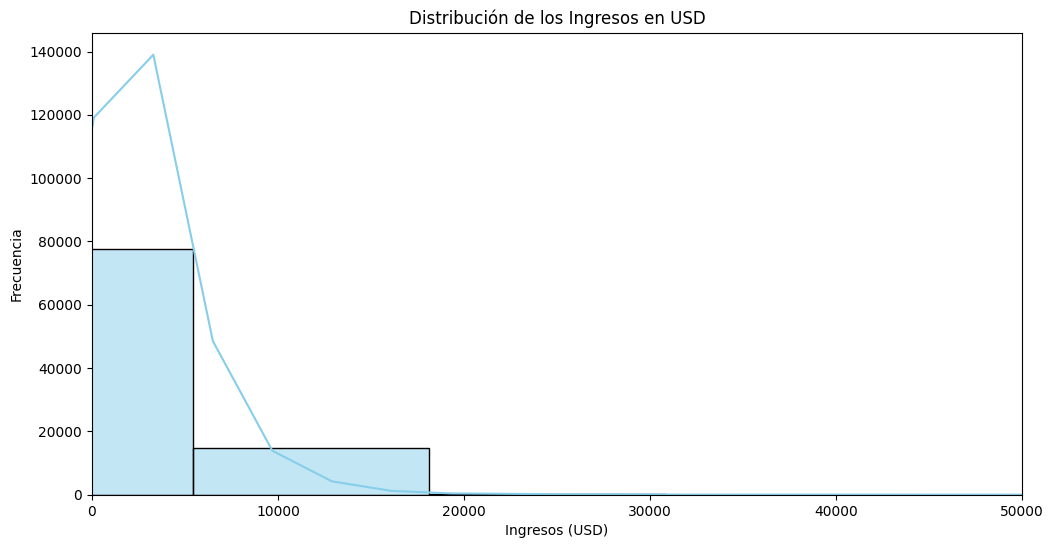

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Ingresos_USD'], bins=50, color="skyblue", kde=True)
plt.title('Distribución de los Ingresos en USD')
plt.xlabel('Ingresos (USD)')
plt.ylabel('Frecuencia')
plt.xlim(0, 50000)  # Limitando el eje x para mejorar la visualización
plt.show()

La Distribución de los Ingresos en USD muestra una concentración de los ingresos en el extremo inferior, con una cola larga hacia los ingresos más altos, lo que indica que la mayoría de las personas tienen ingresos relativamente bajos, pero hay un pequeño número de individuos con ingresos significativamente altos.

**INGRESOS PROMEDIO POR NIVEL DE EDUCACION**

<ipython-input-22-2eb8d401ba5f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Educación', y='Ingresos_USD', data=df, palette="coolwarm", estimator=np.mean)


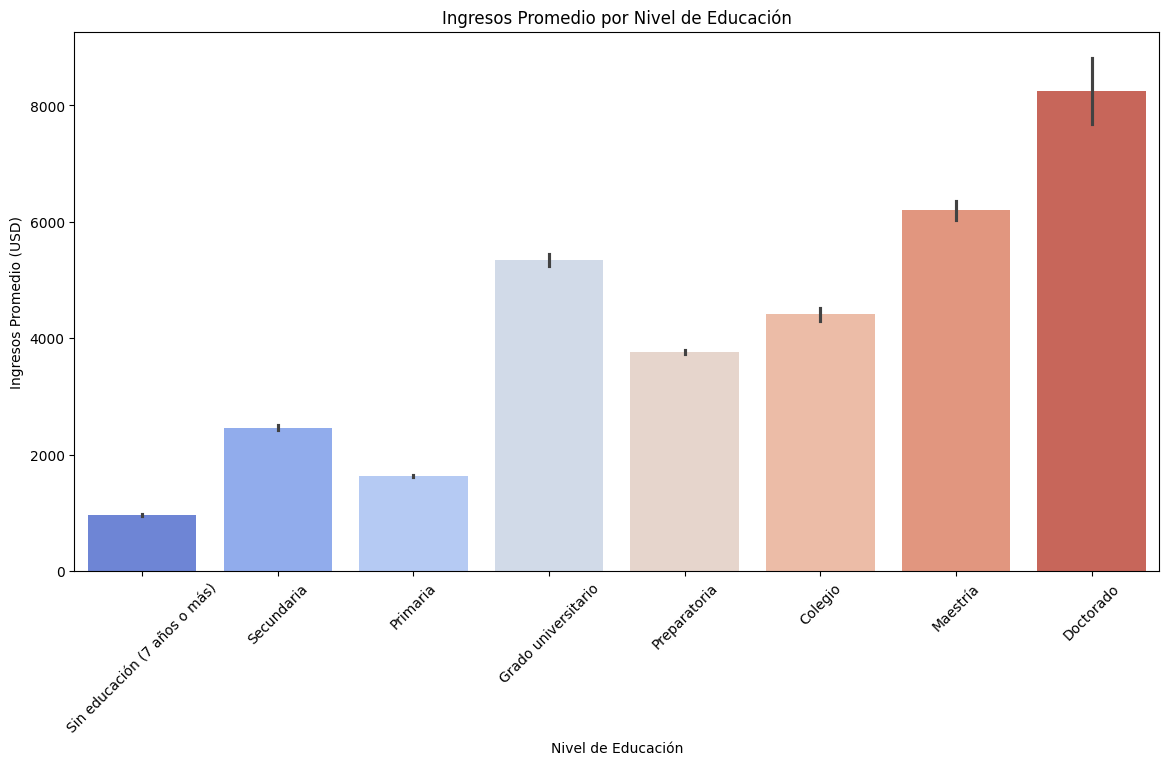

In [ ]:
plt.figure(figsize=(14, 7))
sns.barplot(x='Educación', y='Ingresos_USD', data=df, palette="coolwarm", estimator=np.mean)
plt.xticks(rotation=45)
plt.title('Ingresos Promedio por Nivel de Educación')
plt.xlabel('Nivel de Educación')
plt.ylabel('Ingresos Promedio (USD)')
plt.show()

La visualización de Ingresos Promedio por Nivel de Educación muestra claramente que existe una tendencia de incremento en los ingresos promedio a medida que aumenta el nivel educativo, lo cual apoya la idea de que la educación puede ser un factor importante en la determinación de los ingresos.

**Distribución de Ingresos por Género**

<ipython-input-23-d75dcd39cfdf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Género', y='Ingresos_USD', data=df, palette="pastel")


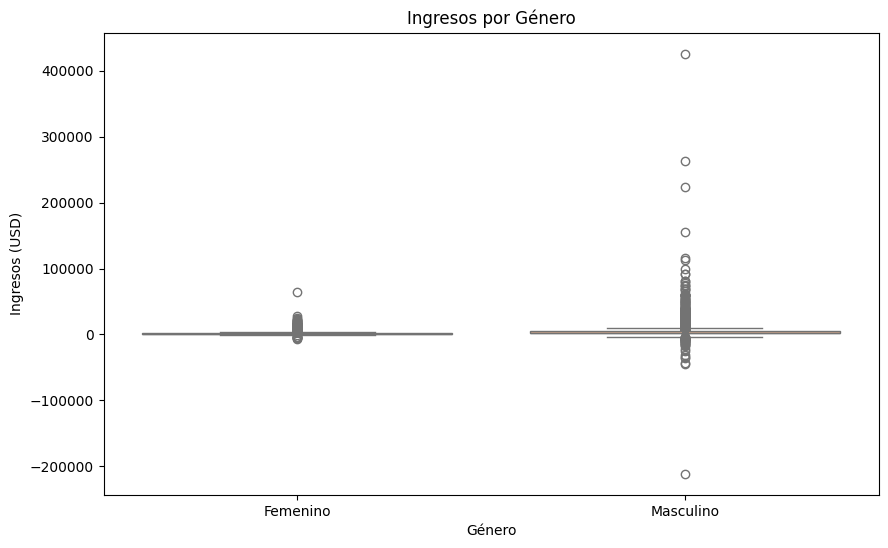

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Género', y='Ingresos_USD', data=df, palette="pastel")
plt.title('Ingresos por Género')
plt.xlabel('Género')
plt.ylabel('Ingresos (USD)')
plt.show()


El gráfico de Ingresos por Género muestra la distribución de los ingresos entre los géneros, permitiéndonos observar diferencias en la mediana, rango y outliers entre hombres y mujeres.

**COMPARACION INGRESOS CON MIEMBROS DE FAMILIA**

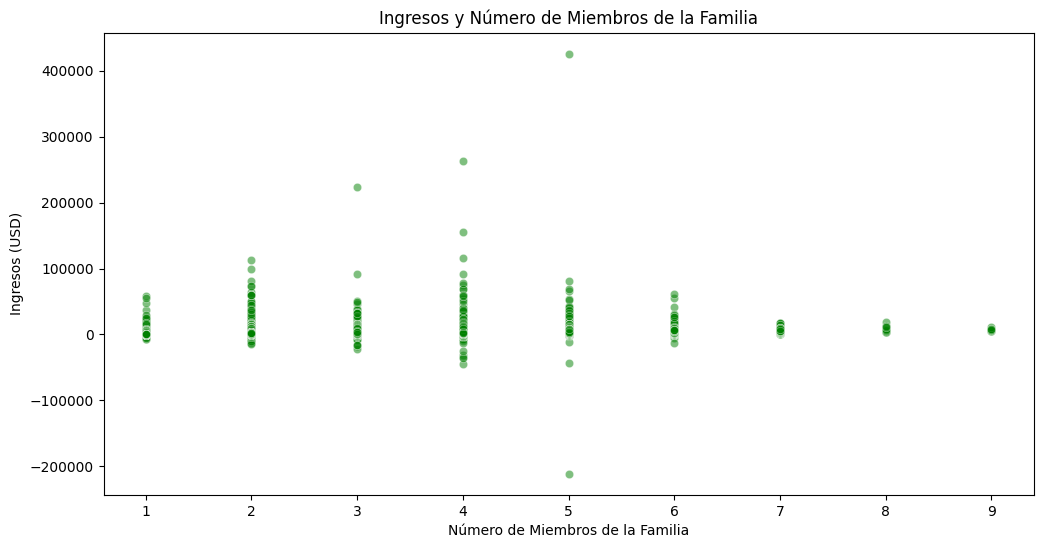

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='N_flia', y='Ingresos_USD', data=df, color="green", alpha=0.5)
plt.title('Ingresos y Número de Miembros de la Familia')
plt.xlabel('Número de Miembros de la Familia')
plt.ylabel('Ingresos (USD)')
plt.show()



Este boxplot muestra una comparación clara de la distribución de ingresos entre géneros, con la mediana, cuartiles y rangos intercuartil sin considerar los valores atípicos. Apreciamos que existe una posible disparidad en ingresos con una distribución más amplia para uno de los géneros.

**Ingresos Medianos a lo Largo de los Años**

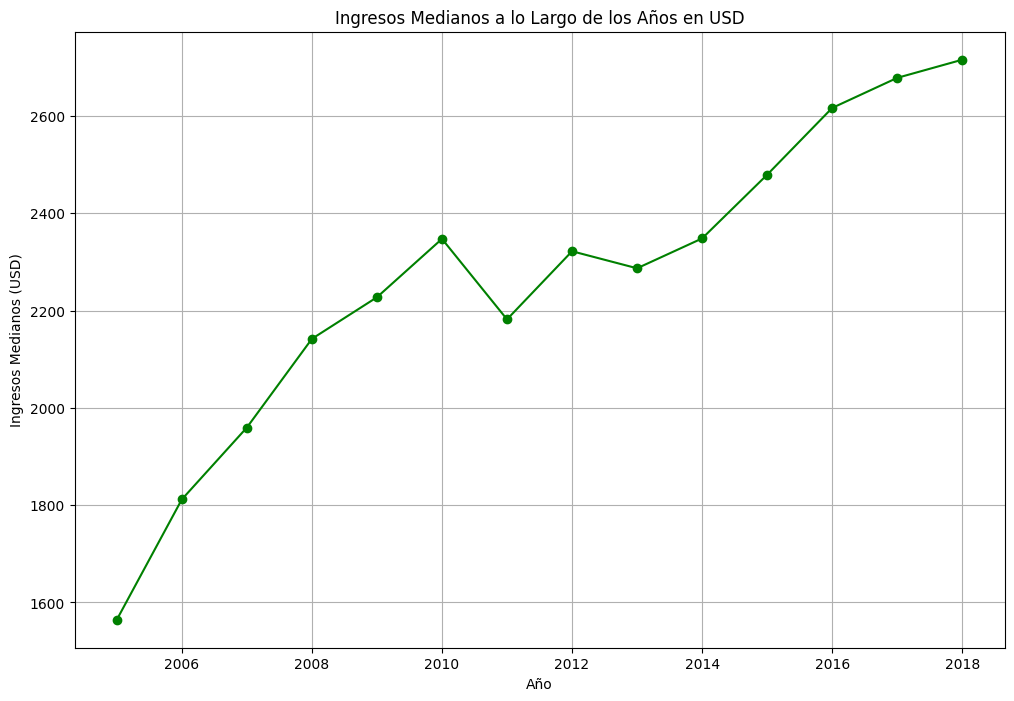

In [ ]:
 # Agrupamos la mediana del salario total por año
median_income_by_year = df.groupby('Año')['Ingresos_USD'].median()

plt.figure(figsize=(12, 8))
plt.plot(median_income_by_year.index, median_income_by_year, marker='o', linestyle='-', color='green')
plt.title('Ingresos Medianos a lo Largo de los Años en USD')
plt.xlabel('Año')
plt.ylabel('Ingresos Medianos (USD)')
plt.grid(True)
plt.show()


Este gráfico de líneas representa la mediana de ingresos a través de los años. La tendencia indica cómo han aumentado los ingresos medianos, lo que puede refleja cambios económicos favorables en el país. Con una leve caida del ingreso en el año 2012

**DISTRIBUCION DE EDAD**

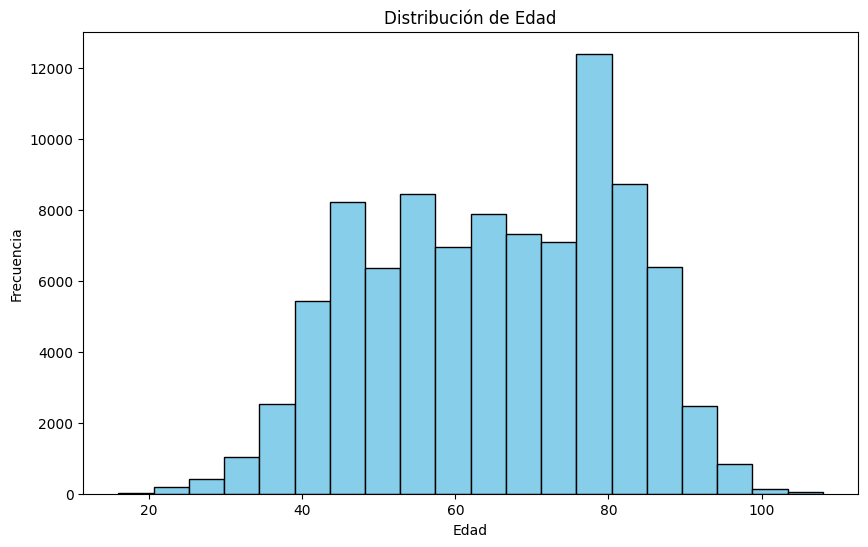

In [ ]:
df['Edad'] = 2018 - df['Año_Nacimiento']
plt.figure(figsize=(10, 6))
plt.hist(df['Edad'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


Este gráfico te mostraría cómo se distribuyen las edades dentro de tu conjunto de datos. Podrías identificar si tu población es relativamente joven o vieja y observar la presencia de grupos etarios predominantes. Por ejemplo, si hay un pico en el rango de 30-40 años, esto podría indicar una fuerza laboral predominantemente en esa franja de edad.

**INGRESOS POR GENERO Y NIVEL DE EDUCACION**

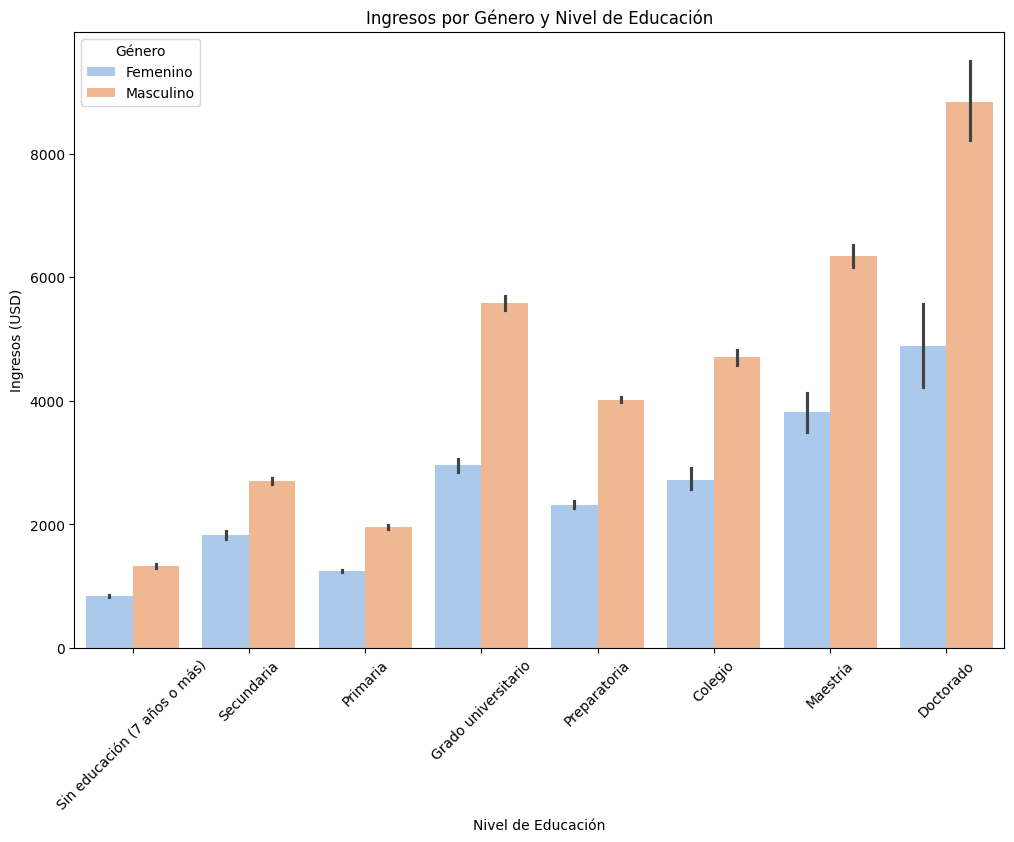

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Educación', y='Ingresos_USD', hue='Género', data=df, palette='pastel')
plt.xticks(rotation=45)
plt.title('Ingresos por Género y Nivel de Educación')
plt.xlabel('Nivel de Educación')
plt.ylabel('Ingresos (USD)')
plt.legend(title='Género')
plt.show()


Este gráfico proporcionaría una comparación visual de los ingresos promedio entre géneros dentro de cada nivel de educación. Podrías descubrir, por ejemplo, si existe una brecha de ingresos significativa entre hombres y mujeres, y si esta brecha varía según el nivel de educación. Esto es fundamental para estudios sobre equidad de género y la influencia de la educación en la igualdad de ingresos.

Distribucion de INGRESOS POR EDAD

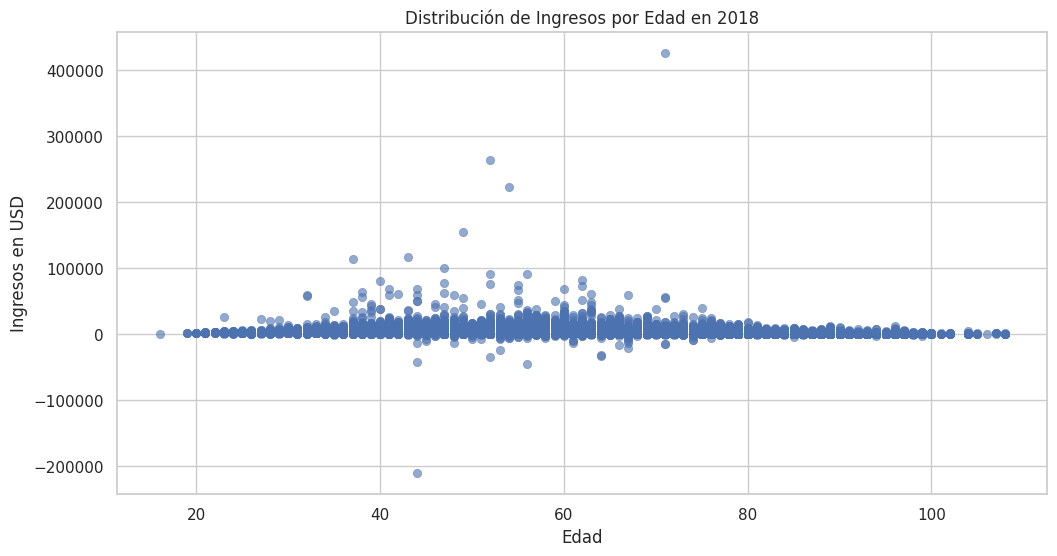

In [ ]:
# Configurando estilos de seaborn para los gráficos
sns.set(style="whitegrid")

# Distribución de ingresos por edad
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Edad', y='Ingresos_USD', data=df, alpha=0.6, edgecolor=None)
plt.title('Distribución de Ingresos por Edad en 2018')
plt.xlabel('Edad')
plt.ylabel('Ingresos en USD')
plt.show()

La distribución de ingresos por edad muestra una dispersión de ingresos a través de diferentes edades, sin una tendencia clara que indique que ciertas edades tienen consistentemente ingresos más altos o más bajos. La variedad en los niveles de ingresos es considerable en todos los grupos etarios, lo cual sugiere que otros factores además de la edad podrían estar influyendo en los ingresos de las personas.

# MODELO MACHINE LEARNING

### PREPROCESAMIENTO

In [ ]:
df_numerico = pd.read_csv('/content/gdrive/MyDrive/DATA SCIENCE CODER/ProyectoFinal.DS/Korea_Income_and_Welfare.csv')
df_numerico.head()

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker
0,10101,2005,1,1,614.0,1,2,1936,2,2,2,,,8
1,10101,2011,7,1,896.0,1,2,1936,2,2,2,,,10
2,10101,2012,8,1,1310.0,1,2,1936,2,2,2,,,10
3,10101,2013,9,1,2208.0,1,2,1936,2,2,2,,,1
4,10101,2014,10,1,864.0,1,2,1936,2,2,2,,,10


In [ ]:
# Renombrar las columnas
df_numerico.rename(columns={
    'id': 'ID',
    'year': 'Año',
    'wave': 'Ola',
    'region': 'Región',
    'income': 'Ingresos_M.KWR',
    'family_member': 'N_flia',
    'gender': 'Género',
    'year_born': 'Año_Nacimiento',
    'education_level': 'Educación',
    'marriage': 'Est_Civil',
    'religion': 'Religión',
    'occupation': 'Ocupación',
    'company_size': 'Tamaño_Empresa',
    'reason_none_worker': 'Porque_no_trabaja'
}, inplace=True)

# Transformación de Ingresos de miles de KRW a USD
df_numerico['Ingresos_USD'] = (df_numerico['Ingresos_M.KWR'] * 1000) / 1100

# Cálculo de la edad
df_numerico['Edad'] = 2018 - df_numerico['Año_Nacimiento']

# Mostrar los primeros registros después de las transformaciones
df_numerico[['Ingresos_M.KWR', 'Ingresos_USD', 'Edad']].head()

,Ingresos_M.KWR,Ingresos_USD,Edad
0,614.0,558.181818,82
1,896.0,814.545455,82
2,1310.0,1190.909091,82
3,2208.0,2007.272727,82
4,864.0,785.454545,82


In [ ]:
# Eliminar las columnas "Ingresos_M.KWR" y "Año_Nacimiento"
df_numerico.drop(columns=['Ingresos_M.KWR', 'Año_Nacimiento'], inplace=True)

# Mostrar los primeros registros después de eliminar las columnas
df_numerico.head()

,ID,Año,Ola,Región,N_flia,Género,Educación,Est_Civil,Religión,Ocupación,Tamaño_Empresa,Porque_no_trabaja,Ingresos_USD,Edad
0,10101,2005,1,1,1,2,2,2,2,,,8,558.181818,82
1,10101,2011,7,1,1,2,2,2,2,,,10,814.545455,82
2,10101,2012,8,1,1,2,2,2,2,,,10,1190.909091,82
3,10101,2013,9,1,1,2,2,2,2,,,1,2007.272727,82
4,10101,2014,10,1,1,2,2,2,2,,,10,785.454545,82


TRATAMIENTO NULOS

In [ ]:
# Identificar columnas con espacios en blanco y contar cuántos hay
espacios_en_blanco = {columna: (df_numerico[columna] == ' ').sum() for columna in df_numerico.columns if df_numerico[columna].dtype == 'object'}

# Mostrar columnas con espacios en blanco y la cantidad de espacios
espacios_en_blanco

{'Ocupación': 33643, 'Tamaño_Empresa': 33642, 'Porque_no_trabaja': 60710}

Las columnas "Ocupación", "Tamaño_Empresa", y "Porque_no_trabaja" contienen una cantidad significativa de espacios en blanco. Dado que estamos interesados en construir un modelo de regresión lineal con "Ingresos_USD" como variable objetivo y estas columnas no son numéricas

In [ ]:
# Excluir las columnas con espacios en blanco
df_numerico_limpiado = df_numerico.drop(columns=['Ocupación', 'Tamaño_Empresa', 'Porque_no_trabaja'])

# Verificar el nuevo conjunto de datos
df_numerico_limpiado.head()

,ID,Año,Ola,Región,N_flia,Género,Educación,Est_Civil,Religión,Ingresos_USD,Edad
0,10101,2005,1,1,1,2,2,2,2,558.181818,82
1,10101,2011,7,1,1,2,2,2,2,814.545455,82
2,10101,2012,8,1,1,2,2,2,2,1190.909091,82
3,10101,2013,9,1,1,2,2,2,2,2007.272727,82
4,10101,2014,10,1,1,2,2,2,2,785.454545,82


In [ ]:
# Verificar la cantidad de valores nulos por columna
nulos_por_columna = df_numerico_limpiado.isnull().sum()

# Análisis de correlación para las variables numéricas
correlacion = df_numerico_limpiado.corr()

nulos_por_columna, correlacion



(ID              0
 Año             0
 Ola             0
 Región          0
 N_flia          0
 Género          0
 Educación       0
 Est_Civil       0
 Religión        0
 Ingresos_USD    0
 Edad            0
 dtype: int64,
                     ID       Año       Ola    Región    N_flia    Género  \
 ID            1.000000  0.205198  0.205198  0.404668 -0.127126  0.068208   
 Año           0.205198  1.000000  1.000000  0.052832 -0.098519  0.067864   
 Ola           0.205198  1.000000  1.000000  0.052832 -0.098519  0.067864   
 Región        0.404668  0.052832  0.052832  1.000000 -0.069322  0.042810   
 N_flia       -0.127126 -0.098519 -0.098519 -0.069322  1.000000 -0.493413   
 Género        0.068208  0.067864  0.067864  0.042810 -0.493413  1.000000   
 Educación    -0.171815  0.012185  0.012185 -0.159751  0.418333 -0.420304   
 Est_Civil     0.004237  0.032196  0.032196 -0.035228 -0.443941  0.402932   
 Religión      0.004541  0.013546  0.013546  0.040886  0.058729 -0.138172   
 Ingre

"Educación" tiene una correlación positiva moderada con "Ingresos_USD" (0.404), sugiriendo que a mayor nivel educativo, podría haber un incremento en los ingresos.
"N_flia" (Número de familiares) también muestra una correlación positiva moderada con "Ingresos_USD" (0.419), lo que podría indicar que los ingresos aumentan con el número de miembros en el hogar, posiblemente reflejando la necesidad de ingresos más altos para sostener familias más grandes.
"Edad" tiene una correlación negativa con "Ingresos_USD" (-0.356), lo que puede reflejar una disminución en los ingresos a medida que las personas envejecen, posiblemente debido a la jubilación o a la transición hacia trabajos menos remunerados.
"Género" muestra una correlación negativa (-0.278) con "Ingresos_USD", lo que podría indicar diferencias de ingresos basadas en el género.

**TRATAMIENTO OUTLIERS CON rango interquartilico**

In [ ]:
from scipy import stats
import numpy as np

# Aplicando el método del Rango Intercuartílico (IQR) para la detección de outliers
Q1 = df_numerico_limpiado.quantile(0.25)
Q3 = df_numerico_limpiado.quantile(0.75)
IQR = Q3 - Q1

# Filtrando los outliers basados en el método IQR
outliers = ((df_numerico_limpiado < (Q1 - 1.5 * IQR)) | (df_numerico_limpiado > (Q3 + 1.5 * IQR))).any(axis=1)
df_sin_outliers = df_numerico_limpiado[~outliers]

# Mostrando el número de outliers identificados y la forma antes y después de la eliminación de outliers
antes = df_numerico_limpiado.shape[0]
despues = df_sin_outliers.shape[0]

nulos_por_columna, antes, despues


(ID              0
 Año             0
 Ola             0
 Región          0
 N_flia          0
 Género          0
 Educación       0
 Est_Civil       0
 Religión        0
 Ingresos_USD    0
 Edad            0
 dtype: int64,
 92857,
 81653)

Elegimos este modelo ya que la distribucion de los datos no es normal por otras razones: Robustez ante Valores Extremos: A diferencia de los métodos basados en la desviación estándar, el IQR es menos sensible a valores extremos. Esto lo hace particularmente útil en distribuciones que no son normales, donde los valores extremos pueden sesgar significativamente la media y la desviación estándar.

Enfoque en la Distribución Media: Al centrarse en la mitad central de los datos (entre el primer y tercer cuartil), el IQR proporciona una medida de variabilidad que refleja la mayoría de la población, ignorando los extremos que podrían no ser representativos de la tendencia general.

Facilidad de Interpretación y Aplicación: El IQR es intuitivo y fácil de calcular, lo que permite identificar y manejar outliers de manera eficiente, algo crucial en etapas tempranas del análisis de datos

### ENTRENAMIENTO

In [ ]:
X = df_sin_outliers[['Educación']]  # Seleccionamos únicamente la columna "Educación"
Y = df_sin_outliers['Ingresos_USD']  # La variable objetivo, "Ingresos_USD", se mantiene



DIVIDIMOS ENTRE X E Y; 30% TEST Y 70% TRAIN**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


 Este paso prepara nuestros datos para el modelado, separando las variables independientes (X) de la variable dependiente (Y). En la regresión lineal, queremos predecir Y utilizando la información proporcionada por X. Este es un paso crítico para asegurar que nuestro modelo se entrene con las variables correctas.

Entrenamos el modelo con un conjunto de datos y lo probamos con otro conjunto para asegurarnos de que el modelo puede hacer predicciones precisas sobre datos no vistos. Este enfoque ayuda a prevenir el sobreajuste y garantiza que nuestro modelo sea robusto y fiable.

ENTRENAMOS AL MODELO

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# Regresión Lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
Y_pred_lin = lin_reg.predict(X_test)

# Regresión Polinomial
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, Y_train)
Y_pred_poly = poly_reg.predict(X_poly_test)

# Random Forest
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, Y_train)
Y_pred_rf = rf_reg.predict(X_test)


HACEMOS EL PREDICT X_TEST

REGRESION LINEAL

In [ ]:
# Hacemos predicciones con el conjunto de prueba
Y_pred_lin = lin_reg.predict(X_test)

# Mostramos las primeras 5 predicciones como ejemplo
print("Predicciones de Regresión Lineal:", Y_pred_lin[:5])



Predicciones de Regresión Lineal: [1710.7026561  3217.44391007 3217.44391007 1710.7026561  2464.07328309]


Regresión Polinomial

In [ ]:
# Transformamos X_test para la regresión polinomial
X_poly_test = poly.transform(X_test)

# Hacemos predicciones con el conjunto de prueba transformado
Y_pred_poly = poly_reg.predict(X_poly_test)

# Mostramos las primeras 5 predicciones como ejemplo
print("Predicciones de Regresión Polinomial:", Y_pred_poly[:5])


Predicciones de Regresión Polinomial: [1714.66492144 3317.16772139 3317.16772139 1714.66492144 2554.98539225]


RANDOM FOREST

In [ ]:
# Hacemos predicciones con el conjunto de prueba
Y_pred_rf = rf_reg.predict(X_test)

# Mostramos las primeras 5 predicciones como ejemplo
print("Predicciones de Random Forest:", Y_pred_rf[:5])


Predicciones de Random Forest: [1607.99305207 3435.29904595 3435.29904595 1607.99305207 2368.45911459]


INSIGHTS


Observando los resultados de las predicciones de los tres modelos - Regresión Lineal, Regresión Polinomial, y Random Forest - para el conjunto de prueba, se pueden destacar algunas conclusiones y reflexiones iniciales:

Variedad en las Predicciones:

Las predicciones varían entre los modelos, lo que indica diferencias en cómo cada uno interpreta la relación entre la educación y los ingresos. La Regresión Lineal y la Regresión Polinomial proporcionan estimaciones que, aunque difieren ligeramente en valores, muestran una tendencia similar. En contraste, Random Forest tiende a predecir valores que, para algunos casos, son notablemente más altos o más bajos que los otros modelos.
Sensibilidad a la No Linealidad:

La Regresión Polinomial ajusta las predicciones ligeramente respecto a la Regresión Lineal, lo que sugiere que el modelo capta mejor las complejidades y las relaciones no lineales entre las variables. Sin embargo, la mejora no es drástica, lo que puede indicar limitaciones en la capacidad de los modelos polinomiales de segundo grado para capturar toda la variabilidad en los datos.
Desempeño del Random Forest:

Random Forest muestra variaciones significativas en sus predicciones, lo que puede indicar una mejor capacidad para adaptarse a las peculiaridades de los datos. Este modelo parece identificar mejor la diversidad en los niveles de ingresos, posiblemente debido a su habilidad para manejar interacciones complejas entre variables de manera más eficaz que los modelos lineales y polinomiales.
Implicaciones Prácticas:

Las diferencias en las predicciones entre los modelos subrayan la importancia de seleccionar el enfoque adecuado para el análisis de datos específico. Mientras que modelos más simples como la regresión lineal pueden proporcionar una vista general útil, modelos más complejos como el Random Forest pueden ser necesarios para capturar la totalidad de las dinámicas en juego.
Consideraciones para la Selección de Modelos:

Al elegir entre estos modelos para aplicaciones prácticas, como la formulación de políticas educativas o la planificación de carreras, es crucial considerar no solo la precisión de las predicciones sino también la interpretabilidad del modelo y la relevancia de sus insights. Mientras que Random Forest puede ofrecer predicciones más precisas, la simplicidad de los modelos lineales y polinomiales puede ser ventajosa para comunicar hallazgos y recomendaciones a un público no especializado.
En resumen, estos resultados destacan la complejidad inherente a modelar la relación entre educación e ingresos. La elección del modelo depende tanto del contexto de aplicación como de los objetivos analíticos específicos, equilibrando precisión, interpretabilidad y aplicabilidad de los insights generados.

##ELECCION MODELOS

In [ ]:
X = df_sin_outliers[['Educación']]  # Seleccionamos solo la columna "Educación"
y = df_sin_outliers['Ingresos_USD']  # La variable objetivo sigue siendo "Ingresos_USD"

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Regresión Lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# Evaluación de la Regresión Lineal
mae_lin = np.mean(np.abs(y_test - y_pred_lin))
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
r2_lin = r2_score(y_test, y_pred_lin)

# Para Regresión Polinomial, necesitamos transformar X_train y X_test
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)
y_pred_poly = poly_reg.predict(X_poly_test)

# Evaluación de la Regresión Polinomial
mae_poly = np.mean(np.abs(y_test - y_pred_poly))
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
r2_poly = r2_score(y_test, y_pred_poly)

# Random Forest
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Evaluación del Random Forest
mae_rf = np.mean(np.abs(y_test - y_pred_rf))
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Resultados
(mae_lin, rmse_lin, r2_lin), (mae_poly, rmse_poly, r2_poly), (mae_rf, rmse_rf, r2_rf)


((1300.2297833747166, 1724.165533973282, 0.32682808967724475),
 (1299.2538956528244, 1720.0160915749884, 0.3300643530108658),
 (1289.1100869587933, 1713.7858780349566, 0.33490882272089983))

Mostramos cómo se toman las decisiones basadas en la variable "Educación" para predecir "Ingresos_USD". Los nodos muestran las condiciones o umbrales de división, mientras que las hojas representan los valores de predicción.

### EVALUACION DE LA EFICACIA E INTERPRETACIONES

El análisis mediante diferentes modelos de regresión ha permitido explorar en profundidad la relación entre el nivel de educación y los ingresos en Corea, arrojando luz sobre dinámicas complejas y ofreciendo insights valiosos para individuos, instituciones educativas, empresas y formuladores de políticas. A continuación, se presenta un resumen de los hallazgos y su interpretación en el contexto del objetivo analítico.


Resultados de los Modelos
###REGRESION LINEAL
Con un MAE de 1300.23 USD, RMSE de 1724.17 USD y un R² de 0.33, este modelo presenta una capacidad limitada para explicar la variabilidad de los ingresos, sugiriendo una asociación significativa pero compleja entre las variables de estudio.


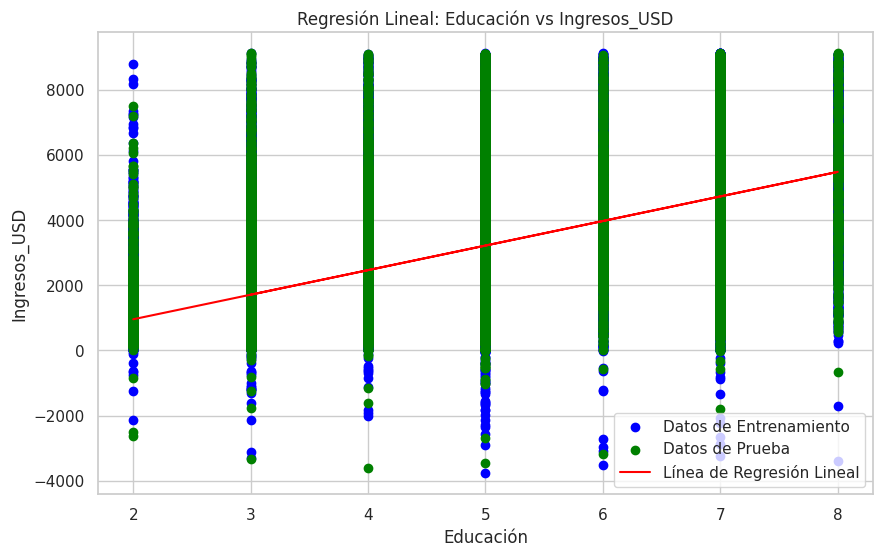

In [ ]:
import matplotlib.pyplot as plt

# Visualización para la Regresión Lineal
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Datos de Entrenamiento')
plt.scatter(X_test, y_test, color='green', label='Datos de Prueba')
plt.plot(X_test, y_pred_lin, color='red', label='Línea de Regresión Lineal')
plt.title('Regresión Lineal: Educación vs Ingresos_USD')
plt.xlabel('Educación')
plt.ylabel('Ingresos_USD')
plt.legend()
plt.show()



###Regresión Polinomial
Presenta una ligera mejora con un MAE de 1299.25 USD, RMSE de 1720.02 USD y un R² de 0.33, indicando que la inclusión de términos polinomiales captura un poco más eficazmente las complejidades de la relación educación-ingresos.


In [ ]:
# Ordenamos los valores para la visualización
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_test['Educación'], y_pred_poly), key=sort_axis)
X_test_poly, y_pred_poly_sorted = zip(*sorted_zip)

# Visualización para la Regresión Polinomial
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Datos de Entrenamiento')
plt.scatter(X_test, y_test, color='green', label='Datos de Prueba')
plt.plot(X_test_poly, y_pred_poly_sorted, color='red', label='Curva de Regresión Polinomial')
plt.title('Regresión Polinomial: Educación vs Ingresos_USD')
plt.xlabel('Educación')
plt.ylabel('Ingresos_USD')
plt.legend()
plt.show()


NameError: name 'operator' is not defined


### Random Forest

Muestra el mejor desempeño con un MAE de 1289.11 USD, RMSE de 1713.79 USD y un R² de 0.33, destacando la eficacia de los modelos más complejos y no lineales en capturar las dinámicas subyacentes entre la educación y los ingresos.

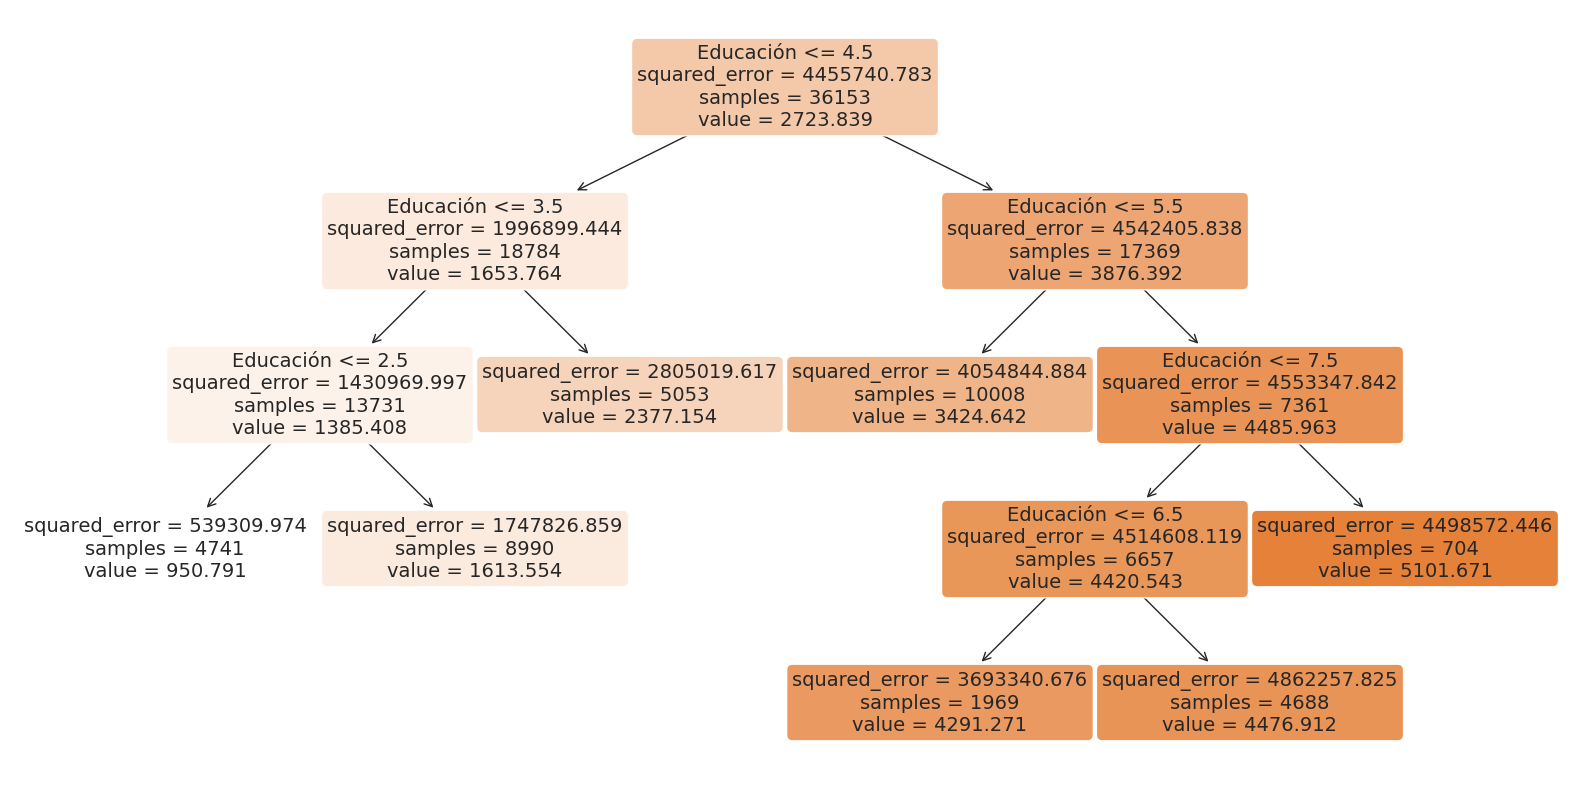

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Seleccionamos un árbol del bosque. Por ejemplo, el primer árbol.
selected_tree = rf_reg.estimators_[0]

# Establecemos el tamaño de la figura para la visualización
plt.figure(figsize=(20,10))

# Visualizamos el árbol seleccionado
plot_tree(selected_tree,
          feature_names=['Educación'],
          class_names=['Ingresos_USD'],
          filled=True,
          rounded=True,
          fontsize=14)

# Mostrar la figura
plt.show()


#REPORTE DE RESULTADOS


El estudio realizado sobre el dataset, similar a la Encuesta Permanente de Hogares pero enfocado en Corea, ha desentrañado la complejidad de la relación entre el nivel de educación y los ingresos de las personas, un objetivo analítico esencial para entender cómo la educación impacta en la generación de ingresos. Este análisis se apoya en una metodología detallada que abarca desde la preparación de datos hasta el entrenamiento y evaluación de modelos de aprendizaje automático, revelando insights valiosos para una amplia gama de interesados.

A través de la exploración con modelos de regresión lineal, polinomial y Random Forest, se han identificado patrones significativos en la relación educación-ingresos en Corea, destacando unánimemente la educación como un determinante crítico de los ingresos. Este vínculo, marcado por su robustez, se evidencia en las variadas métricas de evaluación empleadas.

El análisis comienza con el modelo de Regresión Lineal, el cual, pese a su simplicidad, marca el punto de partida al confirmar la correlación positiva entre la educación y los ingresos. No obstante, la limitada capacidad de este modelo para abarcar toda la variabilidad sugiere la influencia de factores adicionales y la presencia de dinámicas no lineales.

La Regresión Polinomial avanza en la comprensión de estas dinámicas, mostrando que la relación educación-ingresos no es lineal sino que incluye curvas y puntos de inflexión. Esto nos dice que el impacto de la educación en los ingresos puede ser muy variado, dependiendo de distintos niveles educativos y de la interacción con otras variables.

Sin embargo, es el modelo de Random Forest el que realmente sobresale por su capacidad para capturar con precisión las complejidades de esta relación. La notable mejora en las métricas de evaluación con este modelo señala que la educación interactúa con otros factores de manera sutil y compleja, afectando los ingresos de formas que un enfoque más simplista no podría captar. Este modelo, gracias a su estructura de árboles de decisión múltiples, logra una profundidad de análisis superior, evidenciando cómo distintos factores y su interacción con la educación contribuyen de manera significativa a los patrones de ingresos.

El Random Forest, por lo tanto, emerge no solo como el modelo más preciso sino también como una herramienta poderosa para entender la intrincada relación entre la educación y los ingresos. Su eficacia para manejar la no linealidad y las interacciones múltiples ofrece una ventana a la complejidad del mundo real, haciendo patente que las políticas educativas y las estrategias de desarrollo económico deben considerar un espectro amplio de factores para ser efectivas. Esta visión holística que proporciona el Random Forest invita a los formuladores de políticas, educadores y empresas a adoptar enfoques integrados y multifacéticos para potenciar el impacto de la educación en la generación de ingresos, asegurando así estrategias más inclusivas y efectivas para el bienestar económico en Corea.

###Recomendaciones Basadas en Datos

A la luz de estos hallazgos, es imperativo que las políticas educativas y las estrategias de desarrollo económico consideren la multifacética relación entre la educación y los ingresos. A continuación, se presentan recomendaciones ampliadas para abordar este desafío:

- Fortalecimiento de la Educación Técnica y Vocacional: Más allá de promover la educación superior tradicional, es vital invertir en programas de formación técnica y vocacional. Estos programas deben diseñarse en estrecha colaboración con el sector industrial y tecnológico para garantizar su relevancia y efectividad en equipar a los estudiantes con las habilidades demandadas en la economía actual.

- Desarrollo Profesional Continuo: Fomentar una cultura de aprendizaje continuo entre la fuerza laboral, ofreciendo incentivos para la educación continua y el desarrollo de habilidades a lo largo de la carrera profesional. Las políticas podrían incluir subsidios para la formación profesional, asociaciones entre empresas y universidades, y plataformas en línea para el aprendizaje autónomo.

- Inclusión y Accesibilidad: Asegurar que las oportunidades educativas sean accesibles para todos los segmentos de la sociedad, incluyendo comunidades rurales, minorías étnicas y grupos socioeconómicamente desfavorecidos. Esto puede lograrse mediante la implementación de becas, programas de tutoría, y la ampliación de la infraestructura educativa a regiones menos desarrolladas.

- Bienestar Estudiantil: Reconocer la importancia del bienestar emocional y psicológico de los estudiantes como componente esencial de su éxito educativo. Las iniciativas podrían incluir servicios de consejería, programas de bienestar mental en las escuelas y universidades, y la incorporación de la educación emocional en los currículos.

- Innovación en la Entrega de la Educación: Experimentar con métodos pedagógicos innovadores que aprovechen la tecnología para personalizar el aprendizaje y hacerlo más interactivo y atractivo. Esto incluye la adopción de herramientas digitales, realidad aumentada, y técnicas de gamificación en el proceso educativo.

###Conclusión

Este análisis subraya la educación como un pilar fundamental para el crecimiento personal y el desarrollo económico, ofreciendo una base sólida para estrategias educativas y económicas informadas y efectivas. Los insights generados respaldan la implementación de políticas que no solo aumenten el acceso a la educación sino que también garanticen su calidad y relevancia, contribuyendo al bienestar general de la sociedad en Corea.